In [1]:
import pandas as pd

In [2]:
names1880 = pd.read_csv('yob1880.txt', names=['name', 'sex', 'births'])

In [3]:
names1880[:5]

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [4]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [5]:
years = range(1880, 2011)

In [6]:
pieces = []
columns = ['name', 'sex', 'births']

In [7]:
for year in years: #načteme všechny soubory
    path = 'yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

In [8]:
names = pd.concat(pieces, ignore_index=True) #zřetězíme vše do jedné DataFrame

In [9]:
names[0:5]

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [10]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [11]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


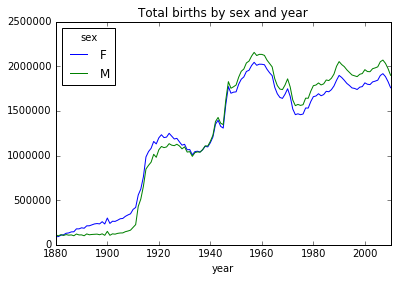

In [12]:
%matplotlib inline
total_births.plot(title='Total births by sex and year')

In [13]:
def add_prop(group):
    # Přidáme funci, která vloží sloupec, s procentem indikujícím počet daného jména z celkově narozených dětí v tomto roce
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [14]:
names[:5]

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [15]:
import numpy as np
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1) #zkontrolujeme, zda nám součet procent dává jedničku

True

In [16]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [17]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [18]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

In [19]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f52d83f3910>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f52c7243690>], dtype=object)

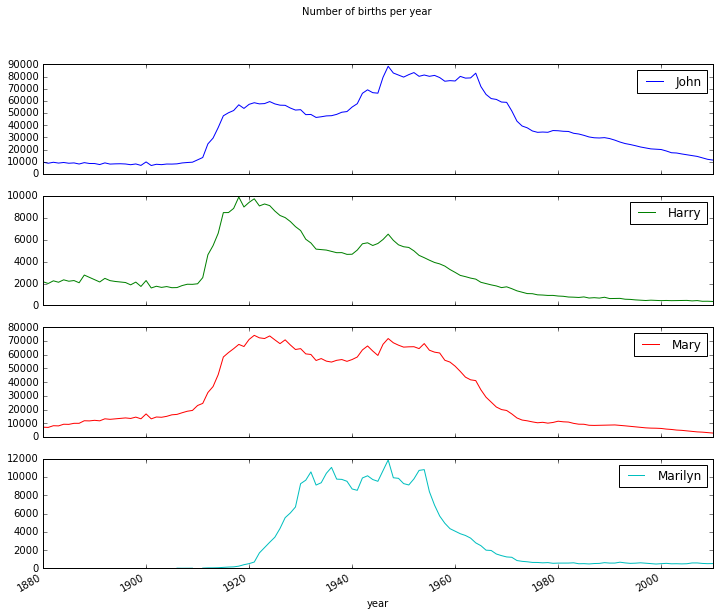

In [20]:
subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")

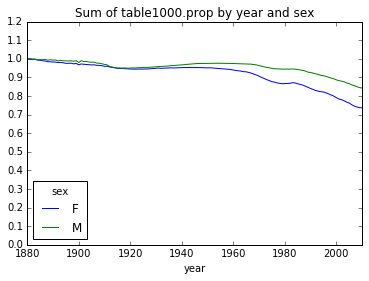

In [21]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
# v tabulce uvidíme, že top 1000 jmen nám v průběhu let zaujímá stále menší podíl
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 20))

In [22]:
#poslední písmena jmen
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

In [23]:
table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)

In [24]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

In [25]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [26]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [27]:
letter_prop = subtable / subtable.sum().astype(float)

In [28]:
import matplotlib.pyplot as plt

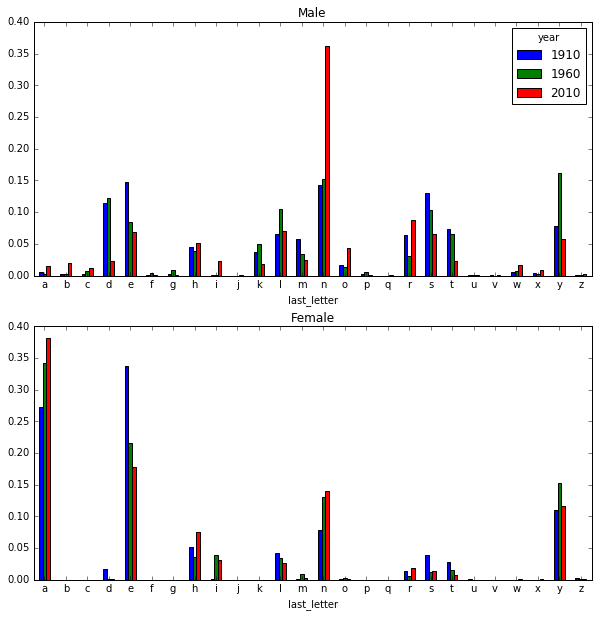

In [29]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',legend=False)


In [31]:
letter_prop = table / table.sum().astype(float)

In [32]:
dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T

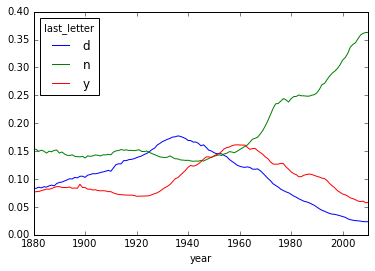

In [33]:
dny_ts.plot()

In [34]:
#Nyní zjistíme jak se vybraná jména měnila v průběhu let z mužských na ženská
all_names = top1000.name.unique()

In [35]:
mask = np.array(['lesl' in x.lower() for x in all_names])

In [36]:
lesley_like = all_names[mask]

In [37]:
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [38]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [39]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [40]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc=sum)
table[:5]

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0


In [41]:
table = table.div(table.sum(1), axis=0)
table[:5]

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857


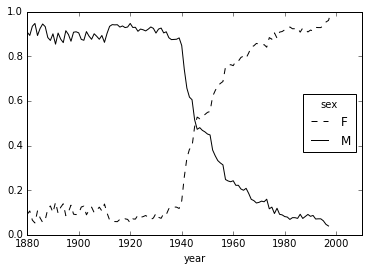

In [42]:
table.plot(style={'M': 'k-', 'F': 'k--'})